# Dimensional Analysis for Quality Control in Manufacturing using Blob Detection

## Import the Image and convert to Grayscale

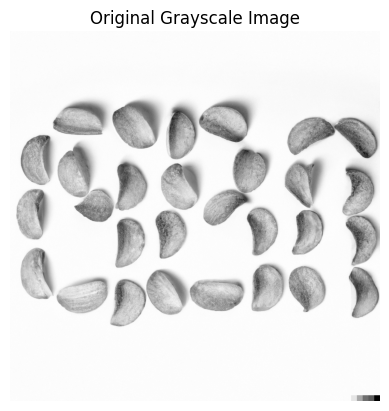

In [100]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("chips1.png")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original grayscale image
plt.imshow(gray, cmap="gray")
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()


## Pre-Processing

Applied Gaussian blur to the grayscale image using cv2.GaussianBlur() to reduce noise. You can adjust the kernel size (5, 5) based on the amount of noise in your image.

https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

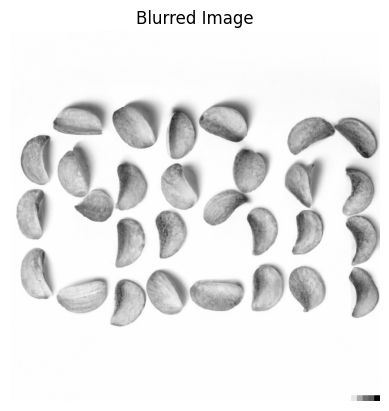

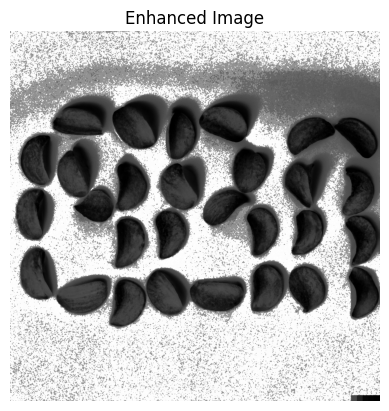

In [117]:
# Apply Gaussian blur to reduce noise
# blurred = cv2.GaussianBlur(gray, (11, 11), 0)

# Apply Median blur to reduce noise
blurred = cv2.medianBlur(gray, 3)

# Display the blurred image
plt.imshow(blurred, cmap="gray")
plt.title("Blurred Image")
plt.axis("off")
plt.show()


# Contrast Enhancement
enhanced_image = cv2.equalizeHist(blurred)  # Apply histogram equalization for contrast enhancement

# Display the Histogram Equalized image
plt.imshow(enhanced_image, cmap="gray")
plt.title("Enhanced Image")
plt.axis("off")
plt.show()

## Thresholding

Performed thresholding on the blurred image to create a binary image using cv2.threshold(). This step helps to segment the Chips from the background.

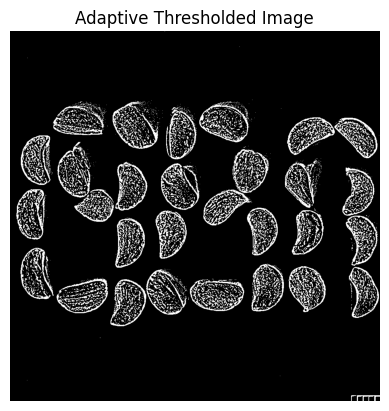

In [118]:
# Apply adaptive thresholding to segment the Chips
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Display the thresholded image
plt.imshow(thresh, cmap="gray")
plt.title("Adaptive Thresholded Image")
plt.axis("off")
plt.show()

## Morphological Processing

https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

* Morphological Closing: Morphological closing is an operation that combines dilation followed by erosion. It is used to fill gaps in the detected blobs and smooth the blobs. In this code, a square-shaped kernel of size (5, 5) is used for the closing operation. The cv2.morphologyEx() function is applied with cv2.MORPH_CLOSE as the operation type.

* Morphological Erosion: Morphological erosion is an operation that reduces the size of bright regions (white areas in this case). It helps distinguish blobs that are close to each other. In this code, a smaller square-shaped kernel of size (3, 3) is used for the erosion operation. The cv2.erode() function is applied with iterations=1 to perform one iteration of erosion.

* Morphological Dilation: Morphological dilation is an operation that increases the size of bright regions. It is used here to fill small gaps inside each blobs, which might have occurred due to thresholding or erosion. In this code, a larger square-shaped kernel of size (7, 7) is used for the dilation operation. The cv2.dilate() function is applied with iterations=1 to perform one iteration of dilation.

By applying morphological closing, erosion, and dilation in this order, we improve the accuracy of blob detection and separation of adjacent blobs. Closing helps to fill small gaps and smooth the blobs, erosion helps distinguish closely connected blobs, and dilation fills small gaps inside each blueberry, leading to more accurate detection of individual blobs in the final output.

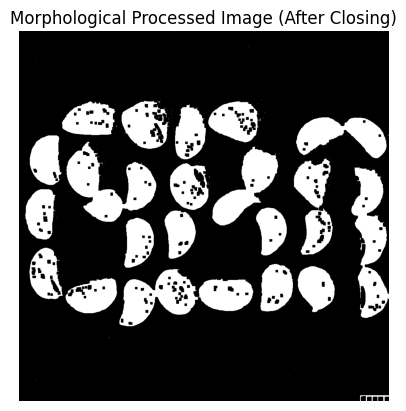

In [136]:
# Perform morphological closing to fill gaps and smooth the blobs
kernel = np.ones((7, 7), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Display the morphological processed image (after closing)
plt.imshow(closing, cmap="gray")
plt.title("Morphological Processed Image (After Closing)")
plt.axis("off")
plt.show()


# # Perform morphological erosion to distinguish blobs
# kernel_erosion = np.ones((7, 7), np.uint8)
# erosion = cv2.erode(thresh, kernel_erosion, iterations=1)

# # Display the eroded image
# plt.imshow(erosion, cmap="gray")
# plt.title("Eroded Image")
# plt.axis("off")
# plt.show()

# # Perform morphological dilation to fill small gaps inside each blob
# kernel_dilation = np.ones((7, 7), np.uint8)
# dilation = cv2.dilate(erosion, kernel_dilation, iterations=1)

# # Display the dilated image
# plt.imshow(dilation, cmap="gray")
# plt.title("Dilated Image")
# plt.axis("off")
# plt.show()

## Blob Detection and Measurement

added two conditions to the loop that iterates through the blobs. The if statement checks if the area of the blob falls within the specified range (min_area_threshold < area < max_area_threshold). If it does, the blob will be considered for further processing (drawing a bounding box and printing the area).

You can adjust the values of min_area_threshold and max_area_threshold to filter the blobs based on the desired size range. Blobs with an area less than min_area_threshold or greater than max_area_threshold will be excluded from further processing. By tuning these values, you can filter out noise or other unwanted detections in the image.

Total Blobs Count: 70
Chips 5: Area = 10731 pixels
Chips 7: Area = 9639 pixels
Chips 9: Area = 10090 pixels
Chips 11: Area = 8845 pixels
Chips 22: Area = 16027 pixels
Chips 28: Area = 8929 pixels
Chips 30: Area = 24487 pixels
Chips 32: Area = 16839 pixels
Chips 37: Area = 14861 pixels
Chips 43: Area = 8985 pixels
Chips 45: Area = 22804 pixels
Chips 52: Area = 8435 pixels
Chips 53: Area = 7781 pixels
Chips 54: Area = 8074 pixels
Chips 56: Area = 8075 pixels
Chips 60: Area = 7912 pixels
Chips 61: Area = 8878 pixels
Chips 62: Area = 9005 pixels
Chips 63: Area = 28368 pixels
Chips 64: Area = 9194 pixels
Chips 69: Area = 471 pixels


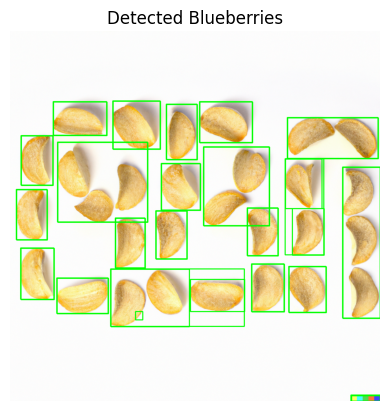

In [137]:
# Perform connected component analysis
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(closing, connectivity=8)

# Print Total Number of Blobs Detected
print(f"Total Blobs Count: {num_labels}")

# Define the minimum and maximum area thresholds to filter the blobs (adjust these values as needed)
min_area_threshold = 100
max_area_threshold = 2000

# Loop through each detected blob
for label in range(1, num_labels):  # Start from 1 to exclude the background label 0
    area = stats[label, cv2.CC_STAT_AREA]

    # Check if the area is within the specified range
    if min_area_threshold < area:

        # Get the bounding box coordinates for the blob
        x, y, w, h = stats[label, cv2.CC_STAT_LEFT], stats[label, cv2.CC_STAT_TOP], \
                     stats[label, cv2.CC_STAT_WIDTH], stats[label, cv2.CC_STAT_HEIGHT]

        # Draw a bounding box around the blob (blueberries)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Print the area of the blob
        print(f"Chips {label}: Area = {area} pixels")

# Convert BGR image to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the final output with detected blueberries
plt.imshow(image_rgb)
plt.title("Detected Blueberries")
plt.axis("off")
plt.show()